In [8]:
import numpy as np
from scipy.special import factorial, beta
import scipy.integrate as integrate
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True

In [3]:
opazeni = np.array([3, 0, 2, 1, 3, 2, 1, 0, 2, 2])

In [4]:
# Metoda momentov ocena theta
theta_1 = 7. / 6. - opazeni.mean() / 2
print('Ocena parametra po metodi momentov je', theta_1)

# Ocena standardne napake
n = opazeni.shape[0]
MSE = 1/(n-1) * ((opazeni - opazeni.mean())**2).sum()
MSE = MSE / n
SE = np.sqrt(MSE)
print('Ocena za standardno napako ocene parametra je', SE)

Ocena parametra po metodi momentov je 0.3666666666666667
Ocena za standardno napako ocene parametra je 0.33993463423951903


In [5]:
# Metoda največjega verjetja
# Na roke izračunamo, da je ocena za parameter enaka:
theta_2 = 2/5

# Fisherjeva informacija se glasi
FI = 4/(theta_2**2) + 6/((1-theta_2)**2)

# Ocena za standardno napako je torej
SE = 1 / np.sqrt(FI)
print('Standardna napaka za oceno preko metode največjega verjetja je', SE)

Standardna napaka za oceno preko metode največjega verjetja je 0.15491933384829668


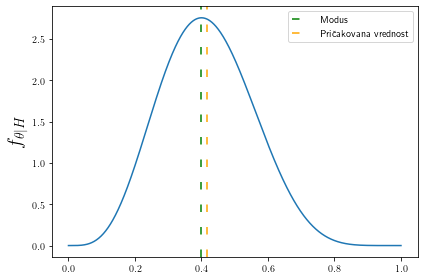

In [33]:
# Bayesov način za enakomerno porazdeljen parameter theta
stevilo_tock = 1000
x = np.linspace(0, 1, stevilo_tock)
f_theta = factorial(11) / (factorial(4) * factorial(6)) * (x**4) * (1-x)**6

# Modus je maksimum gostote porazdelitve
modus = 2/5

# Pričakovana vrednost
mi = 5/12

# Izris gostote pričakovane vrednosti
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(x, f_theta)

modus_plt = ax.axvline(modus, color='g', linestyle=(0, (5, 10)))
modus_plt.set_label('Modus')

mi_plt = ax.axvline(mi, color='orange', linestyle=(0, (5, 10)))
mi_plt.set_label('Pričakovana vrednost')

ax.set_ylabel(r'$f_{\theta | H}$', fontsize=20)
ax.legend()
fig.savefig('../rezultati/gostota_apos_1.jpg', dpi=150)

In [42]:
# Parameter fi
x = np.linspace(0, np.pi/2, stevilo_tock)
modus_fi = np.arctan(np.sqrt(2/3))
f_fi = 2/(beta(9/2, 13/2)) * (np.sin(x)**8) * (np.cos(x)**12)

print('Modus aposteriorne porazdelitve za fi je enak', modus_fi)

Modus aposteriorne porazdelitve za fi je enak 0.684719203002283


In [43]:
# Izračun pričakovane vrednosti
mi_fi = integrate.quad(lambda t: t*np.sin(t)**8 * np.cos(t)**12, 0, np.pi/2)
mi_fi = 2 / (beta(9/2, 13/2)) * mi_fi[0]
print('Pričakovana vrednost aposteriorne porazdelitve za fi je', mi_fi)

Pričakovana vrednost aposteriorne porazdelitve za fi je 0.6898359347575765


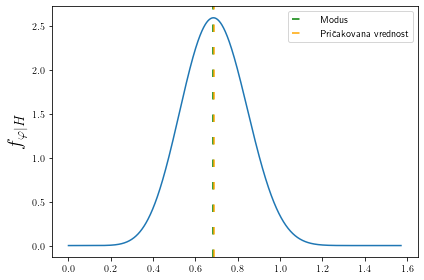

In [44]:
# Izris gostote pričakovane vrednosti
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(x, f_fi)

modus_plt = ax.axvline(modus_fi, color='g', linestyle=(0, (5, 10)))
modus_plt.set_label('Modus')

mi_plt = ax.axvline(mi_fi, color='orange', linestyle=(0, (5, 10)))
mi_plt.set_label('Pričakovana vrednost')

ax.set_ylabel(r'$f_{\varphi | H}$', fontsize=20)
ax.legend()
fig.savefig('../rezultati/gostota_apos_2.jpg', dpi=150)

In [41]:
# Pretvorba ocen v parameter theta iz fi
mi_theta = np.sin(mi_fi)**2
modus_theta = np.sin(modus_fi)**2
print('Nova ocena za theta preko modusa je', modus_theta)
print('Nova ocena za theta preko pričakovane vrednosti je', mi_theta)
print('Stara ocena za theta preko pričakovane vrednosti je', mi)

Nova ocena za theta preko modusa je 0.4
Nova ocena za theta preko pričakovane vrednosti je 0.40501850142112744
Stara ocena za theta preko pričakovane vrednosti je 0.4166666666666667
